In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, VarianceThreshold, SelectFromModel

data = pd.read_csv("D:\\papaleftme\\Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [49]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [50]:
data = df.replace("?", np.NaN);
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [51]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [52]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [53]:
data = data.apply(pd.to_numeric, errors='ignore')
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [64]:
num_val = data.select_dtypes(exclude='object')
obj_val = data.select_dtypes(exclude='int64')
obj_val = data.select_dtypes(exclude='float64')

varianceThreshold = VarianceThreshold(threshold=(0.7))
varianceThreshold.fit(num_val)
selected_data = varianceThreshold.transform(num_val)
selected_data

array([[ 2.0000e+00,  1.6400e+02,  9.9800e+01, ...,  2.4000e+01,
         3.0000e+01,  1.3950e+04],
       [ 2.0000e+00,  1.6400e+02,  9.9400e+01, ...,  1.8000e+01,
         2.2000e+01,  1.7450e+04],
       [ 1.0000e+00,  1.5800e+02,  1.0580e+02, ...,  1.9000e+01,
         2.5000e+01,  1.7710e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]])

In [55]:
num_val

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [56]:
obj_val

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,2337,ohc,four,109,mpfi,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,2824,ohc,five,136,mpfi,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,2844,ohc,five,136,mpfi,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,3086,ohc,five,131,mpfi,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,2395,ohc,four,108,mpfi,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,2952,ohc,four,141,mpfi,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,3049,ohc,four,141,mpfi,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,3012,ohcv,six,173,mpfi,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,3217,ohc,six,145,idi,106,4800,26,27,22470


In [57]:
num_val_drop_price = num_val.drop(["price"], axis=1)
num_val_price = num_val["price"]
varianceThreshold.fit(num_val_drop_price, num_val_price)
selected_data = varianceThreshold.transform(num_val_drop_price)
selected_features = varianceThreshold.get_feature_names_out(
    num_val.columns[:len(num_val.columns)-1])
selected_data = pd.DataFrame(selected_data, columns=selected_features)
display(pd.DataFrame(selected_features))
display(selected_data)


,0
0,symboling
1,normalized-losses
2,wheel-base
3,length
4,width
5,height
6,curb-weight
7,engine-size
8,compression-ratio
9,horsepower


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,102.0,5500.0,24.0,30.0
1,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,115.0,5500.0,18.0,22.0
2,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,8.5,110.0,5500.0,19.0,25.0
3,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,8.3,140.0,5500.0,17.0,20.0
4,2.0,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,8.8,101.0,5800.0,23.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,9.5,114.0,5400.0,23.0,28.0
155,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,8.7,160.0,5300.0,19.0,25.0
156,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,8.8,134.0,5500.0,18.0,23.0
157,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,23.0,106.0,4800.0,26.0,27.0


In [58]:
tr_class = RandomForestRegressor(n_estimators=100)
tr_class.fit(num_val_drop_price, num_val_price)
md = SelectFromModel(tr_class, prefit=True)
selected_data = md.transform(num_val_drop_price)
selected_data

d:\yroki\pythonproject1\venv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[  66.2, 2337. ,   30. ],
       [  66.4, 2824. ,   22. ],
       [  71.4, 2844. ,   25. ],
       [  71.4, 3086. ,   20. ],
       [  64.8, 2395. ,   29. ],
       [  64.8, 2395. ,   29. ],
       [  64.8, 2710. ,   28. ],
       [  64.8, 2765. ,   28. ],
       [  60.3, 1488. ,   53. ],
       [  63.6, 1874. ,   43. ],
       [  63.6, 1909. ,   43. ],
       [  63.8, 1876. ,   41. ],
       [  63.8, 1876. ,   38. ],
       [  63.8, 2128. ,   30. ],
       [  63.8, 1967. ,   38. ],
       [  63.8, 1989. ,   38. ],
       [  63.8, 1989. ,   38. ],
       [  64.6, 2535. ,   30. ],
       [  66.3, 2811. ,   24. ],
       [  63.9, 1713. ,   54. ],
       [  63.9, 1819. ,   38. ],
       [  64. , 1837. ,   42. ],
       [  64. , 1940. ,   34. ],
       [  64. , 1956. ,   34. ],
       [  64. , 2010. ,   34. ],
       [  63.9, 2024. ,   34. ],
       [  65.2, 2236. ,   33. ],
       [  65.2, 2289. ,   33. ],
       [  65.2, 2304. ,   33. ],
       [  62.5, 2372. ,   33. ],
       [  

In [63]:
selectKbest = SelectKBest(k=3, score_func=f_regression)
selectKbest.fit(num_val_drop_price, num_val_price)
kBest_data = selectKbest.transform(num_val_drop_price)
selected_features = selectKbest.get_feature_names_out(
    num_val.columns[:len(num_val.columns) - 1])
display(pd.DataFrame(kBest_data, columns=selected_features))

,width,curb-weight,engine-size
0,66.2,2337.0,109.0
1,66.4,2824.0,136.0
2,71.4,2844.0,136.0
3,71.4,3086.0,131.0
4,64.8,2395.0,108.0
...,...,...,...
154,68.9,2952.0,141.0
155,68.8,3049.0,141.0
156,68.9,3012.0,173.0
157,68.9,3217.0,145.0


In [60]:
data.corr()

C:\Users\miss69\AppData\Local\Temp\ipykernel_16980\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


C:\Users\miss69\AppData\Local\Temp\ipykernel_16980\2453071467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

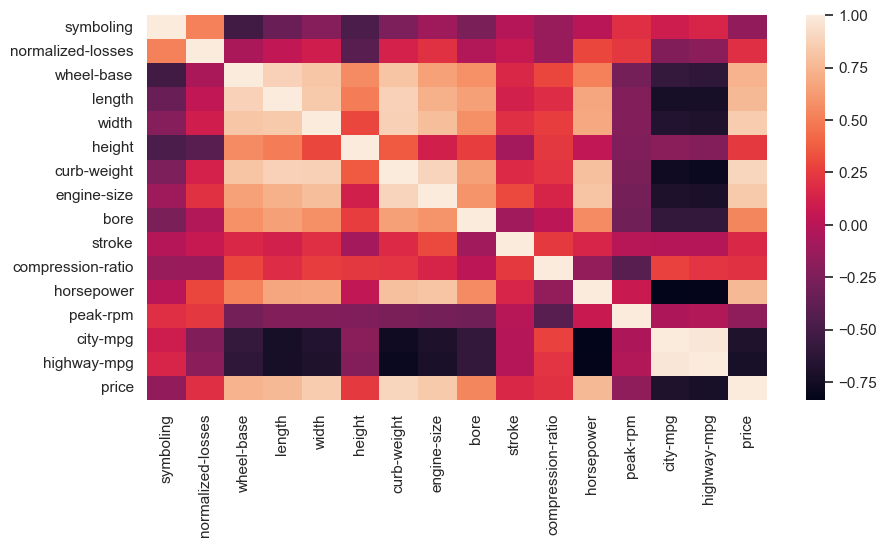

In [61]:
sns.set(rc={'figure.figsize': (10, 5)})
sns.heatmap(data.corr())


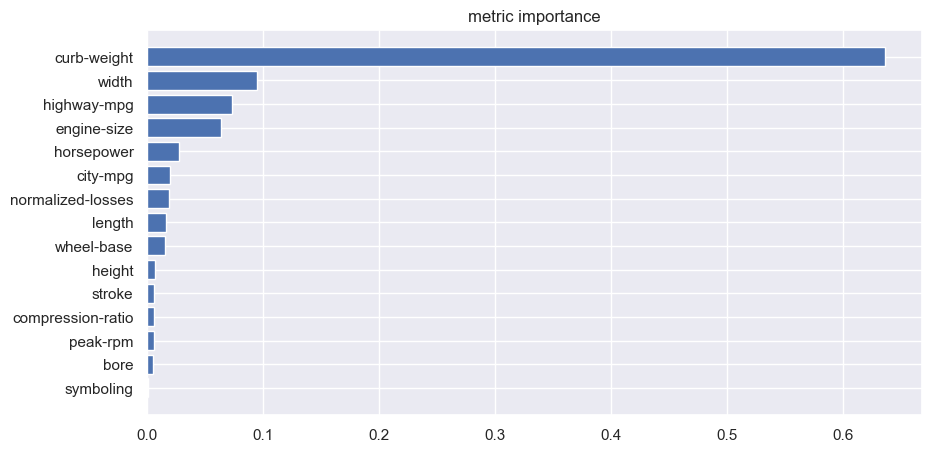

In [62]:
importance = tr_class.feature_importances_
indices = np.argsort(importance)
plt.subplots(figsize=(10,5))
plt.title("metric importance")
plt.yticks(range(len(indices)), np.array(
    num_val_drop_price.columns)[indices])
plt.barh(range(len(indices)), importance[indices])
plt.show()
